# Ahmet Burak Şişci

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
df_animal = pd.read_csv("msleep.csv")


In [ ]:
df_animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          83 non-null     object 
 1   genus         83 non-null     object 
 2   vore          76 non-null     object 
 3   order         83 non-null     object 
 4   conservation  54 non-null     object 
 5   sleep_total   83 non-null     float64
 6   sleep_rem     61 non-null     float64
 7   sleep_cycle   32 non-null     float64
 8   awake         83 non-null     float64
 9   brainwt       56 non-null     float64
 10  bodywt        83 non-null     float64
dtypes: float64(6), object(5)
memory usage: 7.3+ KB


In [ ]:
df_animal.vore.unique()

array(['carni', 'omni', 'herbi', nan, 'insecti'], dtype=object)

In [ ]:
df_animal[df_animal.vore == "insecti"]["sleep_rem"].agg(["mean", "median"]) # koşul ile listeleme yapma

,sleep_rem
mean,3.525
median,3.000


In [ ]:
# add outlier
df_animal.loc[len(df_animal.index)] = ["new insect" , "" , "insecti" , "" , "" , 0.0 , 0.0 , 0.0, 0.0 , 0.0, 0.0 ]
df_animal

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380
82,Red fox,Vulpes,carni,Carnivora,NaN,9.8,2.4,0.350000,14.2,0.05040,4.230


# grafikte simetri varsa ortalama ve medyan birbirine benzer.

### aykırı degerler ortalamayı çok kaydırır.

### yayılım grafikleri ile ölçmeye bak

### max ve min değerin farkı "range" olarak adlandırılır

### varyans: her veri noktalarının ortalamadan farkını bul ve karesini al.

### varyans verilerin ne kadar dağıldığını gösterir.

### varyans büyük değerler çoıkabilir. bu nedenle "standart sapma" çıktı. standart sapma, varyansın kareköküdür.

### kuartiller(çeyreklikler): çeyreğe bölerler. verilerin %25,%50(ortalama),%75 den daha küçük olduğunu iletir.

### box plot ile kuartiller hızlıca bulunabilir.

### interquartile range: "Q3(%75) - Q1(%25)" işlemi ile bulunur

### varyans nupy kütüphanesi ile hesaplanır.

In [ ]:
import numpy as np
np.var(df_animal.sleep_total, ddof=1)

20.863040734366034

In [ ]:
# varyansın karekökü = standart sapma

# Pandas'ın .var() fonksiyonu varsayılan olarak ddof=1 kullanır (df_animal.sleep_total.var()).
# NumPy'ın np.var() fonksiyonu ise varsayılan olarak ddof=0 kullanır.


# Varyansın Mantığı Nedir?
Varyansın temel mantığı, bir veri setinin ne kadar "güvenilmez" veya "değişken" olduğunu tek bir sayıyla özetlemektir.


## Amacımız: Verilerin ortalamadan ne kadar saptığını ölçmek.
## İlk Fikir: Her bir sayının ortalamadan farkını alıp toplayalım.
### Problem: Bazı farklar pozitif (ortalamadan büyük), bazıları negatif (ortalamadan küçük) olacak. Bunları topladığımızda birbirlerini yok ederler ve sonuç sıfıra çok yakın çıkar. Bu bize hiçbir bilgi vermez.
## İkinci Fikir: Negatif değerlerden kurtulmamız lazım. Bunun iki yolu var: Mutlak değer almak veya karelerini almak
Cezalandırma Etkisi: Kare almak, ortalamadan çok uzaklaşan "aşırı" değerleri (aykırı değerleri) daha fazla vurgular ve cezalandırır. 2'nin karesi 4 iken, 10'un karesi 100'dür. Bu, büyük sapmaların dağınıklık ölçüsüne daha fazla katkıda bulunmasını sağlar..


### ddof=0: Popülasyon Standart Sapması
Ne zaman kullanılır?
Bir konu hakkındaki tüm verilere sahip olduğunuzda kullanılır.
Örnek: Bir sınıftaki tüm 15 öğrencinin final notlarını analiz ediyorsunuz. Başka öğrenci yok. Bu durumda elinizdeki veri, popülasyonun kendisidir.
Nasıl Hesaplanır?
Hesaplamada, veri noktası sayısı olan n kullanılır.
Veri setinin ortalaması (μ) bulunur.
Her bir veri noktasının ortalamadan farkı alınır ve bu farkın karesi hesaplanır.
Bu karelerin hepsinin ortalaması alınır (yani hepsi toplanır ve n'e bölünür). Bu Varyans'tır.
Varyansın karekökü alınarak Standart Sapma bulunur.
Formülde Payda: n
Pandas Karşılığı: df['sutun'].std(ddof=0)


### ddof=1: Örneklem Standart Sapması
Ne zaman kullanılır?
Popülasyonun tamamına ulaşamadığınız ve onu temsil eden bir örneklem (alt küme) üzerinden tahmin yürüttüğünüzde kullanılır. Bu, gerçek hayattaki en yaygın senaryodur.
Örnek: Türkiye'deki üniversite öğrencilerinin haftalık ders çalışma süresini merak ediyorsunuz. Milyonlarca öğrencinin hepsine ulaşmak imkansızdır. Bu yüzden rastgele 500 öğrenci seçip onların verilerini analiz edersiniz. Bu 500 kişilik veri, bir örneklemdir.

### Nasıl Hesaplanır?
Hesaplama, popülasyonun genel değişkenliğini daha doğru tahmin edebilmek için küçük bir düzeltme içerir: Paydada n yerine n-1 kullanılır.
Örneklemin ortalaması (x̄) bulunur.
Her bir veri noktasının ortalamadan farkı alınır ve karesi hesaplanır.
Bu karelerin hepsi toplanır ve n-1'e bölünür. Bu, Örneklem Varyansı'dır.
Sonucun karekökü alınarak Örneklem Standart Sapması bulunur.


Formülde Payda: n-1
Pandas Karşılığı: df['sutun'].std(ddof=1) veya sadece df['sutun'].std() (Çünkü ddof=1 varsayılan değerdir).


Neden n-1 Kullanılır? (Bessel Düzeltmesi)
Örneklem üzerinden hesaplanan varyans, popülasyonun gerçek varyansını sistematik olarak daha düşük tahmin etme eğilimindedir. Paydayı n'den n-1'e düşürmek, bölüm sonucunu bir miktar artırır. Bu küçük ayarlama, bu yanlılığı (bias) ortadan kaldırır ve tahminimizi daha güvenilir (tarafsız) hale getirir. Bu işleme "Bessel Düzeltmesi" denir.


# google look: mean absolute deviation formula
ortalama mutlak sapma formülü

## kuantilleri nasıl bulacağım:

In [ ]:
np.quantile(df_animal.sleep_total, 0.5) # numpy kuantil fonksiyonu.

np.float64(10.1)

In [ ]:
np.median(df_animal.sleep_total)

np.float64(10.1)

# Q2 = medyan

In [ ]:
np.quantile(df_animal.sleep_total, [0, 0.25, 0.50, 0.75, 1 ]) #hangi kuantilleri hesaplayacaksan paranteze yaz.
#nump baya iyiymiş ha <3

array([ 0.   ,  7.525, 10.1  , 13.725, 19.9  ])

{'whiskers': [<matplotlib.lines.Line2D at 0x798581458e30>,
 'caps': [<matplotlib.lines.Line2D at 0x7985814592e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x798582255580>],
 'medians': [<matplotlib.lines.Line2D at 0x798581459940>],
 'fliers': [<matplotlib.lines.Line2D at 0x79858145a120>],
 'means': []}

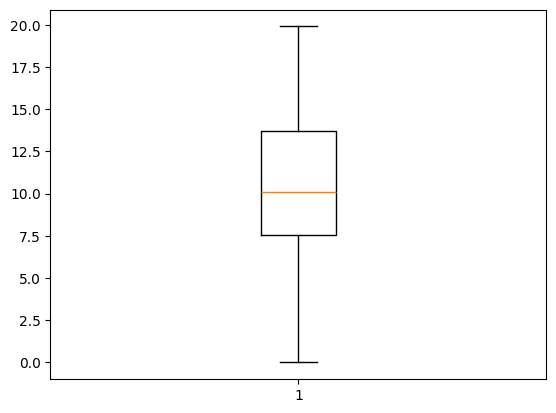

In [ ]:
import  matplotlib.pyplot as plt
plt.boxplot(df_animal.sleep_total) # yukarıda bahsi geçen boxplot grafiği

In [ ]:
# np.linspace(start, stop, num)

np.linspace(0,1,5) # 0-1 arası eşit aralıklar ile 5 sayı ürettirdim

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### linspace, "linear space" ifadesinin kısaltmasıdır.
Türkçeye "doğrusal aralık" veya "doğrusal olarak aralıklı" olarak çevirebiliriz.


#### np.linspace metodu, NumPy kütüphanesinde belirttiğiniz bir başlangıç ve bitiş noktası arasında, eşit aralıklarla bölünmüş sayılardan oluşan bir dizi (array) oluşturur.
Kısaca, "eşit aralıklı sayılar üret" demenin bir yoludur.


## En Basit Kullanımı
np.linspace(başlangıç, bitiş, eleman_sayısı)
başlangıç: Dizinin ilk elemanı.
bitiş: Dizinin son elemanı (bu değer diziye dahildir).
eleman_sayısı: Oluşturulacak dizide kaç tane eleman olacağı.


In [ ]:
np.quantile(df_animal.sleep_total, 0.75) - \
np.quantile(df_animal.sleep_total, 0.25)

np.float64(6.199999999999999)

### Kodun Anlamı
np.quantile(df_animal.sleep_total, 0.75): Bu kısım, sleep_total sütunundaki verilerin 3. Çeyrekliğini (Q3) bulur. Yani, verilerin %75'inin bu değerden daha küçük olduğu noktayı hesaplar.
np.quantile(df_animal.sleep_total, 0.25): Bu kısım ise aynı verilerin 1. Çeyrekliğini (Q1) bulur. Yani, verilerin %25'inin bu değerden daha küçük olduğu noktayı hesaplar.
... - ...: Son olarak, 3. Çeyreklik (Q3) değerinden 1. Çeyreklik (Q1) değerini çıkarır.


### Sonuç Olarak Ne İfade Eder?
IQR = Q3 - Q1
Bu işlemin sonucu olan IQR (Çeyrekler Açıklığı), veri setinin yayılımını ölçmek için kullanılır. Standart sapma gibi aykırı değerlerden (outlier) etkilenmediği için daha güvenilir bir yayılım ölçüsüdür.
Özetle, bu kod satırı şunu söyler: "sleep_total verilerinin tam ortasındaki %50'lik kısmının dağıldığı aralığın genişliği nedir?"
Örneğin, sonuç 4.5 çıkarsa, bu, hayvanların uyku sürelerinin orta yarısının 4.5 saatlik bir aralık içinde değiştiği anlamına gelir.


# öenmli!!!:  haftaya duckDB bakacağız. çalış gel.

DuckDB, son yıllarda veri analizi dünyasında oldukça popüler hale gelen modern bir veritabanı sistemidir.
Kısaca DuckDB, "veri analizi için tasarlanmış SQLite" olarak tanımlanabilir.
Daha detaylı açıklamak gerekirse:
DuckDB, sütun odaklı (columnar) ve süreç içi (in-process) çalışan bir analitik veritabanı yönetim sistemidir (OLAP).

In [ ]:
from scipy.stats import iqr
iqr(df_animal.sleep_total)

np.float64(6.199999999999999)

Bu kod, bir önceki sorunuzdaki NumPy kodunun yaptığı işin aynısını, bu kez scipy kütüphanesini kullanarak yapar: df_animal veri setindeki sleep_total sütununun Çeyrekler Açıklığı'nı (Interquartile Range - IQR) hesaplar.


np.quantile(df_animal.sleep_total, 0.75) - np.quantile(df_animal.sleep_total, 0.25)
NumPy versiyonu: IQR'ı hesaplamak için temel adımları (Q3'ü bul, Q1'i bul, birbirinden çıkar) manuel olarak yaparsınız.
SciPy versiyonu: iqr fonksiyonu bu adımları sizin için tek bir çağrıda otomatik olarak yapar. Bu, kodu daha kısa, daha okunaklı ve amaca yönelik hale getirir.
Özetle, her iki kod da tamamen aynı matematiksel sonucu verir. scipy.stats.iqr kullanmak, Çeyrekler Açıklığı'nı hesaplamanın daha doğrudan ve temiz bir yoludur.


## acaip bir şey analtılıyor. ne olduğunu anlamadım sen bak. aşağı kodu yazdım:

In [ ]:
# Finding Outliers

from scipy.stats import iqr

iqr = iqr(df_animal.bodywt)

lower_thereshold = np.quantile(df_animal.bodywt, 0.25) \
- 1.5 * iqr
upper_thereshold = np.quantile(df_animal.bodywt, 0.75) \
+ 1.5 * iqr

df_animal[(df_animal.bodywt < lower_thereshold) | (df_animal.bodywt > upper_thereshold)]

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.00,0.423,600.000
20,Asian elephant,Elephas,herbi,Proboscidea,en,3.9,NaN,NaN,20.10,4.603,2547.000
22,Horse,Equus,herbi,Perissodactyla,domesticated,2.9,0.6,1.000000,21.10,0.655,521.000
23,Donkey,Equus,herbi,Perissodactyla,domesticated,3.1,0.4,NaN,20.90,0.419,187.000
29,Giraffe,Giraffa,herbi,Artiodactyla,cd,1.9,0.4,NaN,22.10,NaN,899.995
30,Pilot whale,Globicephalus,carni,Cetacea,cd,2.7,0.1,NaN,21.35,NaN,800.000
35,African elephant,Loxodonta,herbi,Proboscidea,vu,3.3,NaN,NaN,20.70,5.712,6654.000
50,Tiger,Panthera,carni,Carnivora,en,15.8,NaN,NaN,8.20,NaN,162.564
51,Jaguar,Panthera,carni,Carnivora,nt,10.4,NaN,NaN,13.60,0.157,100.000
52,Lion,Panthera,carni,Carnivora,vu,13.5,NaN,NaN,10.50,NaN,161.499


In [ ]:
sp_lower = np.mean(df_animal.bodywt) - 3 * np.std(df_animal.bodywt, ddof=1)
sp_upper = np.mean(df_animal.bodywt) + 3 * np.std(df_animal.bodywt, ddof=1)

df_animal[(df_animal.bodywt < sp_lower) | (df_animal.bodywt > sp_upper)]
# bunuda isterseniz alın diye attı.


,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
20,Asian elephant,Elephas,herbi,Proboscidea,en,3.9,NaN,NaN,20.1,4.603,2547.0
35,African elephant,Loxodonta,herbi,Proboscidea,vu,3.3,NaN,NaN,20.7,5.712,6654.0


In [ ]:
# bu kodlar önemli olabilir. burada sınava vurgu yaptı hoca.

# vizede yorum olacak kesinlikle. yorumları görmek istiyorum dedi şimdi.

<Axes: ylabel='bodywt'>

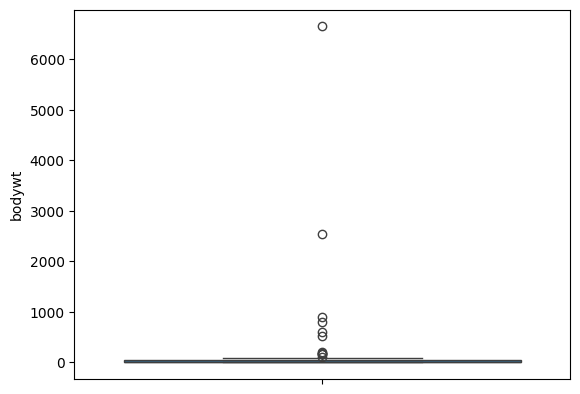

In [ ]:
# seaborn ile boxplot çizimi

import seaborn as sns

sns.boxplot(data=df_animal,  y='bodywt')



<Axes: xlabel='vore', ylabel='bodywt'>

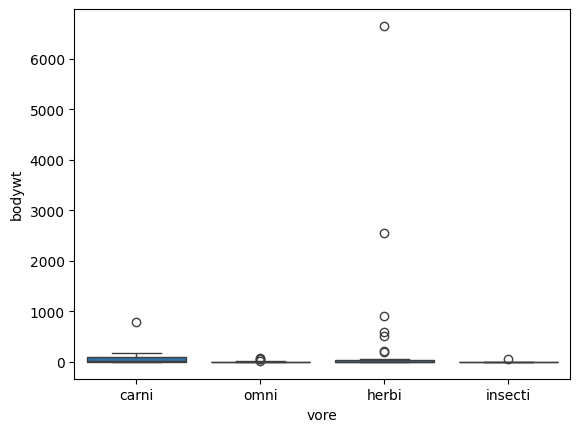

In [ ]:
sns.boxplot(data=df_animal, x='vore', y='bodywt') # seaborn kolayca gruplandırma yapabilir.

In [ ]:
import plotly.express as px

px.box(df_animal, x='vore', y='bodywt')

In [ ]:
# başka bir boxplot çizimi
import plotly.express as px

px.box(df_animal, x='bodywt')

### describe: özet istatistikleri verir. >>> bu şekilde tanımlama isitiyor. başka türlü yazma.

# bence describe kesin soracak

In [ ]:
df_animal.bodywt.describe().T

,bodywt
count,84.000000
mean,164.158536
std,782.295412
min,0.000000
25%,0.141500
50%,1.645000
75%,37.625000
max,6654.000000


## istatistik ikiye ayrılır. çıkarımsal ve (diğerini unuttum). onları bil. sınavda gelişr.

Betimsel İstatistik: Elinizdeki veriyi özetler ve "fotoğrafını çeker". Sadece o veri setinde ne olduğunu anlatır. (Örnek: Bir sınıftaki 30 öğrencinin not ortalaması 75'tir.)

Çıkarımsal İstatistik: Elinizdeki küçük bir veri örneğine bakarak, o verinin ait olduğu daha büyük grup hakkında genellemeler veya tahminler yapar. (Örnek: Sınıftan rastgele seçilen 5 öğrencinin not ortalamasına bakıp, tüm sınıfın genel başarı durumu hakkında bir tahminde bulunmak.)



# olasılık:

#### Olasılık, bir olayın meydana gelme ihtimalinin sayısal ölçüsüdür.
Basitçe, "Bu işin olma şansı ne kadar?" sorusunun cevabıdır. 0 (imkansız) ile 1 (kesin) arasında bir değer alır.


Özetle: Olasılık, belirsiz bir durumdaki tüm simetrik ve eşit derecede mümkün sonuçları listelemek, bunlardan kaç tanesinin bizim ilgilendiğimiz durumu karşıladığını bulmak ve bu iki sayıyı birbirine oranlayarak beklentimizi mantıksal bir sayıya dönüştürme işlemidir.


## değiştirmeli örnekleme(sampling with replacement):
ikinci olayın olasılığı ilkini etkilemiyorsa bağımsız olasılık olurç

online perakende satış verisinde bir sonraki siparişin ne olacağını bulmak için önce bi gruplama gerekir. bir sonrakinin ne olduğunun olasılığına bakalım.



In [ ]:
import pandas as pd

df_sales = pd.read_csv("amir_deals.csv")
df_sales_users = df_sales.groupby("num_users")["amount"].\
agg(sum="sum")

df_sales_users

,sum
num_users,
1,13624.50
2,40732.68
3,24858.82
4,3880.07
5,12428.48
...,...
92,4509.96
94,4171.76
96,8180.81


* .groupby("num_users"): İlk olarak, df_sales tablosu num_users (kullanıcı sayısı) sütununa göre gruplara ayrılır. Yani, aynı kullanıcı sayısına sahip olan tüm satışlar (örneğin, 5 kullanıcılı tüm satışlar, 10 kullanıcılı tüm satışlar vb.) kendi içlerinde bir araya getirilir.
* ["amount"]: Gruplama yapıldıktan sonra, her bir grup içinden sadece amount (satış miktarı) sütunuyla ilgileneceğimizi belirtiriz. Artık her bir kullanıcı sayısı grubu için elimizde sadece o gruba ait satış miktarlarının bir listesi vardır.
* .agg(sum="sum"): Son olarak, agg (aggregate - birleştir) fonksiyonu ile her bir grubun amount listesi üzerinde bir hesaplama yapılır. sum="sum" ifadesi, her bir grup için amount değerlerinin toplanmasını (sum) ve sonuçta oluşacak yeni sütunun adının da sum olmasını söyler.

Bu kod, amir_deals.csv dosyasındaki satış verilerini okur ve her bir "kullanıcı sayısına" (num_users) göre toplam satış miktarını (amount) hesaplar.
Sonuç olarak, "1 kullanıcılı satışların toplamı ne kadar?", "2 kullanıcılı satışların toplamı ne kadar?" gibi soruları cevaplayan özet bir tablo oluşturur.


# hoca sınavda SQL yada Python verip SQL ve Python şeklinde karşılığını isteyecek.

### sqLite stiesi ile tarayıcıdan SQL çalışabiliriz.

duckDB sadece bu veri işlerini yapmak için oluşturulmuş

## veri setinden rastgele kayıt seçmek için "sample" fonksiyonu kullnaılır.

In [ ]:
df_sales_users.sample()

,sum
num_users,
26,6929.84


### eğer her seferinde aynı kaydı seçsin istersen (pseude random) seed değerini aynı ver. böylece aynı seep ile aynı havuzdan çekim yaparsınız. buda aynı kayıtları seçmeni sağlar.


In [ ]:
import numpy as np

np.random.seed(42)

In [ ]:
np.random.seed(42) # hep aynı seed değerini seçmesini sağlamak için kullanılır.

In [ ]:

df_sales_users.sample()


,sum
num_users,
33,7077.48


# koşullu olasılık:

bir olayın sonucunun başka bir olayı etkilemesi

burda bir bağımlı olasılık var:  bir olayın olması dğğerini etkiliyor.

In [ ]:
df_sales_users.sample(5,replace=True)

,sum
num_users,
68,11225.36
43,12319.18
31,15163.88
15,4179.72
48,13355.00


### beklenen değer (expected value): her bir değerrinin çatpılıp toplanması anlamına gelir.

#### bir zar için beklenen değer 3.5 çıkar:
= (1 × 1/6) + (2 × 1/6) + (3 × 1/6) + (4 × 1/6) + (5 × 1/6) + (6 × 1/6)

= = (1+2+3+4+5+6) / 6

= = 21 / 6 = 3.5

discrete uniform distrubition: her ayrık durumun meydana gekme olassılığı varsa, bu lşekilde söylenir.

### büyük sayılar kanunu: İngilizcesi: Law of Large Numbers


##### Türkçe Kısa Açıklaması
Büyük Sayılar Kanunu, bir deneyi çok fazla sayıda tekrarladığınızda, elde ettiğiniz sonuçların ortalamasının, o olayın teorik beklenen değerine (gerçek olasılığına) çok yaklaşacağını söyleyen temel bir istatistik prensibidir.
Daha basit bir ifadeyle:
"Ne kadar çok denersen, sonuçların ortalaması o kadar gerçeğe yaklaşır."


### sürekli olasılık dağılımı: Sürekli Olasılık Dağılımı, sonuçların belirli bir aralıktaki herhangi bir değeri alabildiği durumları tanımlar.
Kesikli dağılımdaki gibi tam sayılarla sınırlı değildir; sonuçlar sonsuz sayıda ara değer alabilir.


### continuous uniform distubituon: Sürekli Düzgün Dağılım (Continuous Uniform Distribution), belirli bir aralıktaki her bir sonucun gerçekleşme olasılığının birbirine eşit olduğu bir olasılık dağılımıdır.
Kısacası, "belirli bir aralıktaki her noktanın eşit şansa sahip olduğu" durumları modeller.


# tüm dağılım eğrilerinin toplam alanı 1 dir. asla değişmez.

### CDF Fonksiyonu Nedir?
CDF (Cumulative Distribution Function - Kümülatif Dağılım Fonksiyonu), bir olasılık dağılımında, rastgele bir değişkenin belirli bir x değerine eşit veya ondan daha küçük bir değer alma olasılığını gösteren fonksiyondur.
Kısacası, "Bu noktaya kadar olan tüm olasılıkların toplamı nedir?" sorusunu cevaplar.
Neden Kullanılır?
CDF'in temel kullanım amacı, olasılık hesaplamalarını çok kolaylaştırmasıdır. Özellikle sürekli dağılımlarda kilit rol oynar.
